<a href="https://colab.research.google.com/github/seasonsOfTheSun/spectral/blob/main/spectral_augmented_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install flax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 4.1 MB/s 
     |████████████████████████████████| 8.3 MB 58.5 MB/s 
     |████████████████████████████████| 66 kB 5.4 MB/s 
     |████████████████████████████████| 154 kB 71.4 MB/s 
     |████████████████████████████████| 237 kB 66.5 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 85 kB 4.2 MB/s 


In [1]:
# make test data
import numpy as np
n = 1000
x = 10*np.random.rand(n)
y = 10*np.random.rand(n)
z = np.sqrt(x**2 + y**2)+np.random.rand(n)
w = y**3/100 + z + np.random.rand(n)
u = z+w + np.random.rand(n)
v = z-w + np.random.rand(n)

In [2]:
X = np.vstack([z,w,u,v]).T

In [3]:
import matplotlib.pyplot as plt

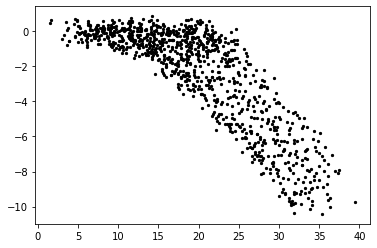

In [4]:
plt.scatter(u,v,c='k',s=5.0)

In [5]:
# define stanndard autoencoder
import jax
import jax.numpy as jnp
import flax.linen as nn

class Encoder(nn.Module):
  output_dim : int

  def setup(self):
    self.layer1 = nn.Dense(self.output_dim)
  
  def __call__(self,X):
    return nn.relu(self.layer1(X))

class Decoder(nn.Module):
  output_dim : int
  def setup(self):
    self.layer2 = nn.Dense(self.output_dim)
  
  def __call__(self,X):
    return self.layer2(X)

class Autoencoder(nn.Module):
  io_dim : int
  n_latents : int


  def setup(self):
    self.encoder = Encoder(n_latents)
    self.decoder = Decoder(io_dim)

  def __call__(self,X):
    return self.decoder(self.encoder(X))


f = Autoencoder()


TypeError: ignored

In [ ]:
#store_parameters = parameters

In [ ]:
@jax.jit
def mse(parameters, X):
  return np.mean((f.apply(parameters, X) - X)**2)

In [6]:
import optax
import tqdm

NameError: ignored

In [8]:
import flax
#parameters = flax.core.unfreeze(parameters)
#parameters['params']['encoder']['layer1'] = store_parameters['params']['layer1']
#parameters['params']['decoder']['layer2'] = store_parameters['params']['layer2']
#parameters = flax.core.freeze(parameters)

In [11]:
# useful functions
flax.core.unfreeze
flax.core.freeze
nn.Module.bind
optax.apply_updates


<function optax._src.update.apply_updates(params: Union[jax._src.basearray.Array, Iterable[ForwardRef('ArrayTree')], Mapping[Any, ForwardRef('ArrayTree')]], updates: Union[jax._src.basearray.Array, Iterable[ForwardRef('ArrayTree')], Mapping[Any, ForwardRef('ArrayTree')]]) -> Union[jax._src.basearray.Array, Iterable[ForwardRef('ArrayTree')], Mapping[Any, ForwardRef('ArrayTree')]]>

In [8]:
n = 1000
parameters = f.init(jax.random.PRNGKey(108),X)
optimizer = optax.adam(0.001)
state = optimizer.init(parameters)

out108 = []
for i in tqdm.tqdm(range(n)):
  value,grad = jax.value_and_grad(mse)(parameters, X)
  out108.append(value)
  updates,state = optimizer.update(grad, state,parameters)
  parameters = optax.apply_updates(parameters, updates)

parameters = f.init(jax.random.PRNGKey(107),X)
optimizer = optax.adam(0.001)
state = optimizer.init(parameters)


out107 = []
for i in tqdm.tqdm(range(n)):
  value,grad = jax.value_and_grad(mse)(parameters, X)
  out107.append(value)
  updates,state = optimizer.update(grad, state,parameters)
  parameters = optax.apply_updates(parameters, updates)


Text(0.5, 0.98, 'apparentlly initialization matters quite a bit...')

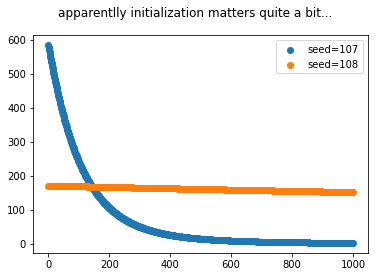

In [253]:

h1 = plt.scatter(range(n), out107)
h2 = plt.scatter(range(n), out108)
plt.legend((h1, h2), ("seed=107", "seed=108"))
plt.suptitle("apparently initialization matters quite a bit...")


In [256]:
boop = f.bind(parameters)


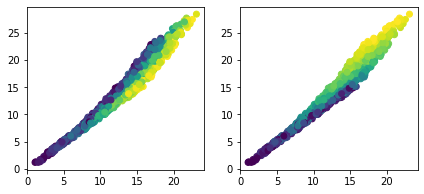

In [265]:
xy_approximated = boop.encoder(X)
fig,axes = plt.subplots(ncols = 2, figsize = [7,3])
ax1,ax2 = axes.flatten()
ax1.scatter(xy_approximated[:,0],xy_approximated[:,1],c=x)
ax2.scatter(xy_approximated[:,0],xy_approximated[:,1],c=y)

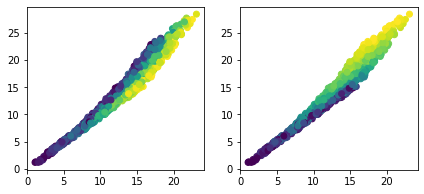

In [266]:
xy_approximated = boop.encoder.layer1(X)
fig,axes = plt.subplots(ncols = 2, figsize = [7,3])
ax1,ax2 = axes.flatten()
ax1.scatter(xy_approximated[:,0],xy_approximated[:,1],c=x)
ax2.scatter(xy_approximated[:,0],xy_approximated[:,1],c=y)

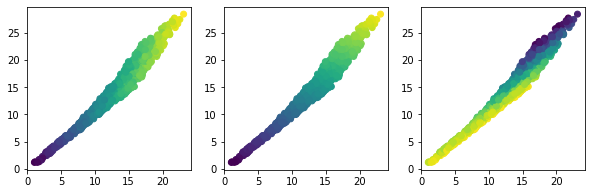

In [268]:
xy_approximated = boop.encoder(X)
fig,axes = plt.subplots(ncols = 3, figsize = [10,3])
ax1,ax2,ax3 = axes.flatten()
ax1.scatter(xy_approximated[:,0],xy_approximated[:,1],c=z)
ax2.scatter(xy_approximated[:,0],xy_approximated[:,1],c=u)
ax3.scatter(xy_approximated[:,0],xy_approximated[:,1],c=v)

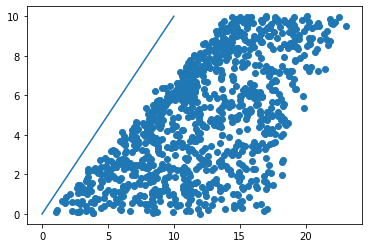

In [271]:
plt.scatter(xy_approximated[:,0],x)
plt.plot([0,10],[0,10])

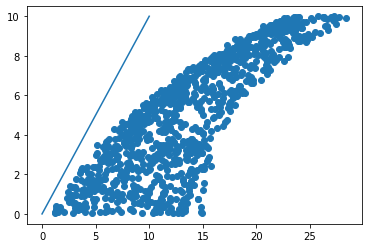

In [272]:
plt.scatter(xy_approximated[:,1],y)
plt.plot([0,10],[0,10])

# Let's get spectral 👻

In [275]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 8.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=a6ae59bdc439d31086f5048e1ac594cf8a2dd6fc1b9087ca80fb3ce19faf2d0d
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=d85b875a87c00cd060d19fb8fd360bff0054e2bd54eeeac0681142b5e53b4870
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [58]:
import sklearn.datasets
dataset = sklearn.datasets.load_breast_cancer()
dataset_name = "breast cancer"
X = dataset['data']
X = (X - np.mean(X))/np.std(X)

In [68]:
print(X.shape[1])

30


In [70]:
import umap
import networkx as nx
import numpy as np
import scipy.sparse

nneighbors = 10
metric = 'euclidean'
rndstate = np.random.RandomState(108)

adjacency,_,_ = umap.umap_.fuzzy_simplicial_set(X, nneighbors, rndstate, metric)


In [60]:
degrees = adjacency * np.ones(X.shape[0])
degrees_inv_sqrt = [1/np.sqrt(x) for x in degrees]
normalized_adjacency = (scipy.sparse.diags(degrees_inv_sqrt)*
                        adjacency*
                        scipy.sparse.diags(degrees_inv_sqrt))


In [61]:

n_evectors = 50                                                                                                          
e,evecs = scipy.sparse.linalg.eigsh(normalized_adjacency, k = n_evectors)



ValueError: ignored

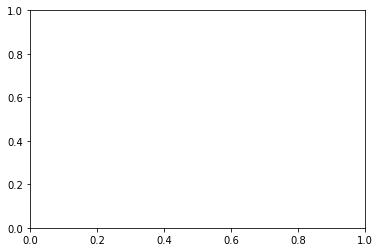

In [62]:
plt.scatter(y,evecs[:,-5])
#plt.plot([0,10],[0,10])

In [63]:
# define spectrally augmented autoencoder
import jax
import jax.numpy as jnp
import flax.linen as nn


class Encoder(nn.Module):
  output_dim : int

  def setup(self):
    self.layer1 = nn.Dense(self.output_dim)
  
  def __call__(self,X):
    return nn.relu(self.layer1(X))

class Decoder(nn.Module):
  output_dim : int
  def setup(self):
    self.layer2 = nn.Dense(self.output_dim)
  
  def __call__(self,X):
    return self.layer2(X)

class Autoencoder(nn.Module):
  io_dim : int
  n_latents : int


  def setup(self):
    self.encoder = Encoder(n_latents)
    self.decoder = Decoder(io_dim)

  def __call__(self,X):
    return self.decoder(self.encoder(X))



class SpectralAutoencoder(nn.Module):
  io_dim : int
  n_latents : int
  n_evecs : int
  
  def setup(self):
    self.latent_encoder = Encoder(self.n_latents)
    self.spectral_encoder = Encoder(self.n_evecs)
    self.decoder = Decoder(self.io_dim)


  def __call__(self,X,evecs):
    latent = self.latent_encoder(X)
    spectral_approximant = self.spectral_encoder(X)
    data_approximant = self.decoder(jnp.hstack([latent,spectral_approximant]))
    return spectral_approximant, data_approximant






In [64]:

io_dim = X.shape[1]
n_evecs = 5
n_latents = 2
selected_evecs = evecs[:,-n_evecs-1:-1]



In [65]:

n = 1000
spectral = SpectralAutoencoder(io_dim,n_latents,n_evecs)
parameters = spectral.init(jax.random.PRNGKey(108), X, selected_evecs)

@jax.jit
def data_encoding_mse(parameters, X, selected_evecs):
  evec_weight = jnp.ones(n_evecs)
  spectral_approximant, data_approximant = spectral.apply(parameters, X, selected_evecs)
  data_encoding_mse = jnp.mean((data_approximant - X)**2)
  return data_encoding_mse

@jax.jit
def spectral_mse(parameters, X, selected_evecs):
  evec_weight = jnp.ones(n_evecs)
  spectral_approximant, data_approximant = spectral.apply(parameters, X, selected_evecs)
  spectral_encoding_mse = jnp.mean(evec_weight*(spectral_approximant - selected_evecs)**2)
  data_encoding_mse = jnp.mean((data_approximant - X)**2)
  return spectral_encoding_mse + data_encoding_mse

optimizer = optax.adam(0.01)
state = optimizer.init(parameters)

out_spectral = []
for i in tqdm.tqdm(range(n)):
  _,grad = jax.value_and_grad(spectral_mse)(parameters, X, selected_evecs)
  value = data_encoding_mse(parameters, X, selected_evecs)
  out_spectral.append(value)
  updates,state = optimizer.update(grad, state,parameters)
  parameters = optax.apply_updates(parameters,updates)








latent_match = Autoencoder(io_dim, n_latents)
parameters = latent_match.init(jax.random.PRNGKey(108),X)


@jax.jit
def latent_match_mse(parameters, X):
  return np.mean((latent_match.apply(parameters, X) - X)**2)

optimizer = optax.adam(0.01)
state = optimizer.init(parameters)


out_latent_match = []
for i in tqdm.tqdm(range(n)):
  value,grad = jax.value_and_grad(latent_match_mse)(parameters, X)
  out_latent_match.append(value)
  updates,state = optimizer.update(grad, state,parameters)
  parameters = optax.apply_updates(parameters,updates)






total_match = Autoencoder(io_dim, n_latents+n_evecs)
parameters = latent_match.init(jax.random.PRNGKey(108),X)
  
@jax.jit
def total_match_mse(parameters, X):
  return np.mean((total_match.apply(parameters, X) - X)**2)


out_total_match = []
for i in tqdm.tqdm(range(n)):
  value,grad = jax.value_and_grad(latent_match_mse)(parameters, X)
  out_total_match.append(value)
  updates,state = optimizer.update(grad, state,parameters)
  parameters = optax.apply_updates(parameters,updates)

100%|██████████| 1000/1000 [00:06<00:00, 149.53it/s]


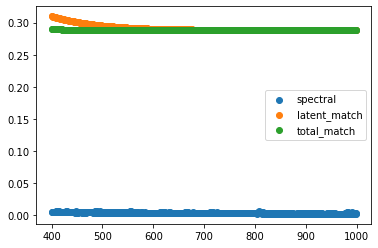

In [66]:
spectral_art = plt.scatter(range(400, n),out_spectral[400:])
latent_match_art = plt.scatter(range(400, n),out_latent_match[400:])
total_match_art = plt.scatter(range(400, n),out_total_match[400:])
plt.legend((spectral_art, latent_match_art, total_match_art), ('spectral', 'latent_match', 'total_match'), )

NameError: ignored

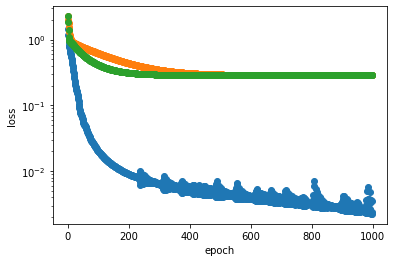

In [69]:
fig,ax = plt.subplots()
ax.set_yscale('log')
spectral_art = ax.scatter(range( n),out_spectral)
latent_match_art = ax.scatter(range(n),out_latent_match)
total_match_art = ax.scatter(range(n),out_total_match)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
fig.suptitle(dataset_name)
plt.legend((spectral_art, latent_match_art, total_match_art), ('eigenvector augmented', 'same number hidden nodes', 'same number total latent'))

[DeviceArray(583.99585, dtype=float32),
 DeviceArray(578.9689, dtype=float32),
 DeviceArray(573.97314, dtype=float32),
 DeviceArray(569.0091, dtype=float32),
 DeviceArray(564.077, dtype=float32),
 DeviceArray(559.17725, dtype=float32),
 DeviceArray(554.3104, dtype=float32),
 DeviceArray(549.4766, dtype=float32),
 DeviceArray(544.6764, dtype=float32),
 DeviceArray(539.9099, dtype=float32),
 DeviceArray(535.17755, dtype=float32),
 DeviceArray(530.4794, dtype=float32),
 DeviceArray(525.8159, dtype=float32),
 DeviceArray(521.18713, dtype=float32),
 DeviceArray(516.5935, dtype=float32),
 DeviceArray(512.0351, dtype=float32),
 DeviceArray(507.5121, dtype=float32),
 DeviceArray(503.02448, dtype=float32),
 DeviceArray(498.5726, dtype=float32),
 DeviceArray(494.1565, dtype=float32),
 DeviceArray(489.7761, dtype=float32),
 DeviceArray(485.43164, dtype=float32),
 DeviceArray(481.12314, dtype=float32),
 DeviceArray(476.8506, dtype=float32),
 DeviceArray(472.61395, dtype=float32),
 DeviceArray(468.

In [346]:
jax.jacfwd(jnp.hstack)([jnp.array([895049548.0, 839458.0, 6.66]),jnp.array([1.0, 1.0, 1.0])])

[DeviceArray([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 1.],
              [0., 0., 0.],
              [0., 0., 0.],
              [0., 0., 0.]], dtype=float32), DeviceArray([[0., 0., 0.],
              [0., 0., 0.],
              [0., 0., 0.],
              [1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 1.]], dtype=float32)]

In [319]:
e

array([0.85930134, 0.86614177, 0.87120413, 0.87236917, 0.88316008,
       0.88396978, 0.88956213, 0.89251416, 0.89299653, 0.90584494,
       0.90763241, 0.9113794 , 0.91255968, 0.91547644, 0.91691988,
       0.91823731, 0.91915803, 0.92156232, 0.92460202, 0.92799118,
       0.93101412, 0.9329355 , 0.93514257, 0.94181261, 0.94279286,
       0.94776303, 0.94829122, 0.9509788 , 0.95358322, 0.95648404,
       0.95878514, 0.96400889, 0.96723517, 0.96988354, 0.9716947 ,
       0.97381458, 0.97695745, 0.97789057, 0.97934234, 0.98219365,
       0.98512622, 0.98772847, 0.98861521, 0.99155173, 0.99339449,
       0.99584048, 0.9977046 , 0.99894694, 0.99963685, 1.        ])

In [320]:
evecs

array([[-0.01524352,  0.02322883, -0.01512288, ..., -0.03254406,
        -0.00477985,  0.0283068 ],
       [-0.09897248,  0.02205627,  0.00257743, ...,  0.02092859,
        -0.04746342,  0.03144832],
       [ 0.00052391,  0.00071816, -0.00022312, ...,  0.05269263,
         0.04495825,  0.03430038],
       ...,
       [-0.00024003, -0.00147164, -0.00035732, ...,  0.04896521,
         0.04111969,  0.03113345],
       [-0.00090146, -0.00638777, -0.00194459, ...,  0.04099129,
         0.03923637,  0.03161324],
       [ 0.04989573,  0.00145231,  0.00670891, ..., -0.01337404,
        -0.02921327,  0.03037398]])

In [385]:
b = Encoder(1)
b.init(jax.random.PRNGKey(108), X)

FrozenDict({
    params: {
        layer1: {
            kernel: DeviceArray([[-0.24151142],
                         [-0.04542233],
                         [-0.951567  ],
                         [-0.4084908 ]], dtype=float32),
            bias: DeviceArray([0.], dtype=float32),
        },
    },
})